In [15]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import random # library for random number generation
import numpy as np # library for vectorized computation


import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


In [16]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'

In [17]:
scrape = requests.get(url)
soup = BeautifulSoup(scrape.content,'lxml')
table = soup.find_all('table')[0] #the[0] is giving us the first table... recall there are 3 tables in this webpage,so i could change that
df = pd.read_html(str(table))
Final=pd.DataFrame(df[0])

In [18]:
print(Final)

    Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                          Neighborhood  
0                                                  NaN  
1                                                  NaN  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                                NaN  
176                                                NaN  
177                                       

In [19]:
Final.head(10)

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
7,M8A,Not assigned,NaN
8,M9A,Etobicoke,Islington Avenue
9,M1B,Scarborough,"Malvern, Rouge"


In [20]:
Final[Final.Borough == "Not assigned"]

,Postal Code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
7,M8A,Not assigned,NaN
10,M2B,Not assigned,NaN
15,M7B,Not assigned,NaN
...,...,...,...
174,M4Z,Not assigned,NaN
175,M5Z,Not assigned,NaN
176,M6Z,Not assigned,NaN
177,M7Z,Not assigned,NaN


In [21]:
FinalC = Final.drop(Final[Final.Borough == "Not assigned"].index)

In [22]:
len(FinalC)

103

In [23]:
FinalC

,Postal Code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
5,M6A,North York,"Lawrence Manor, Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
160,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
165,M4Y,Downtown Toronto,Church and Wellesley
168,M7Y,East Toronto,Business reply mail Processing Centre
169,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [24]:
FinalC.shape

(103, 3)

In [25]:
ZipData = pd.read_csv('D:\OneDrive\GitHub\Geospatial_Coordinates.csv')

In [26]:
#Left_join
#I could have done inner_join, and it only combines/outputs rows where you have both sync up
Final2 = pd.merge(FinalC,
                     ZipData,
                     on = 'Postal Code',
                     how = 'left')

In [27]:
Final2

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
...,...,...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North",43.653654,-79.506944
99,M4Y,Downtown Toronto,Church and Wellesley,43.665860,-79.383160
100,M7Y,East Toronto,Business reply mail Processing Centre,43.662744,-79.321558
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu...",43.636258,-79.498509


In [28]:
#Double check my work, create file on desktop
#Final2.to_csv('D:\out.csv', index=False, header=True)

#### Creating two groups for K-Means Analysis

In [34]:
Lat = Final2["Latitude"]
Lon = Final2["Longitude"]

#### Assign Members and Generate Clusters

In [35]:
colors_map = np.array(['b', 'r'])
def assign_members(Lat, Lon, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(Lat) - centers[0][0]) + np.square(np.array(Lon) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(Lat) - centers[1][0]) + np.square(np.array(Lon) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

In [36]:
def update_centers(Lat, Lon, class_of_points):
    center1 = [np.mean(np.array(Lat)[~class_of_points]), np.mean(np.array(Lon)[~class_of_points])]
    center2 = [np.mean(np.array(Lat)[class_of_points]), np.mean(np.array(Lon)[class_of_points])]
    return [center1, center2]

In [51]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(Lat, Lon, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(43.5, 44, 3, endpoint=True)
    yticks = np.linspace(-79, -80, 3, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('Latitude', fontsize=20)
    ax.set_ylabel('Longitude', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

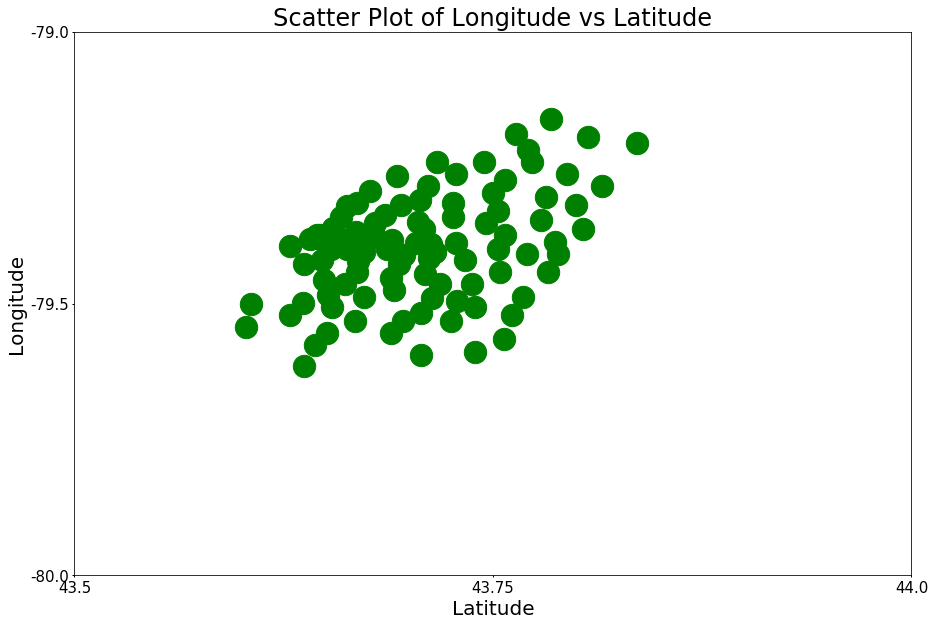

In [52]:
plot_points(figure_title='Scatter Plot of Longitude vs Latitude')

#### Identifying K-Means and Clusters

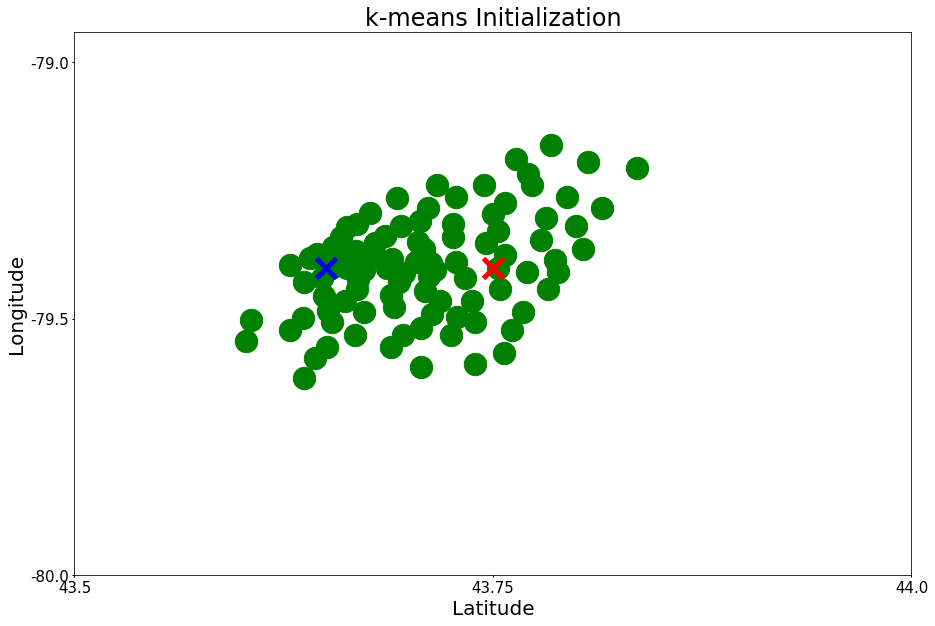

In [55]:
centers = [[43.65, -79.4], [43.75, -79.4]]
plot_points(centers, figure_title='k-means Initialization')

Iteration 1 - Press Enter to update the members of each cluster


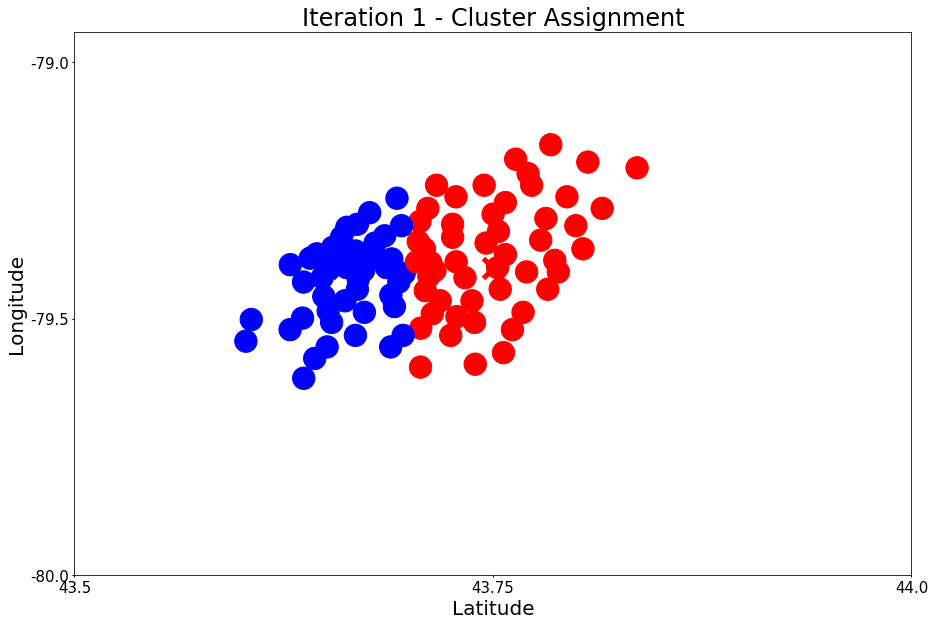

Iteration 1 - Press Enter to update the centers


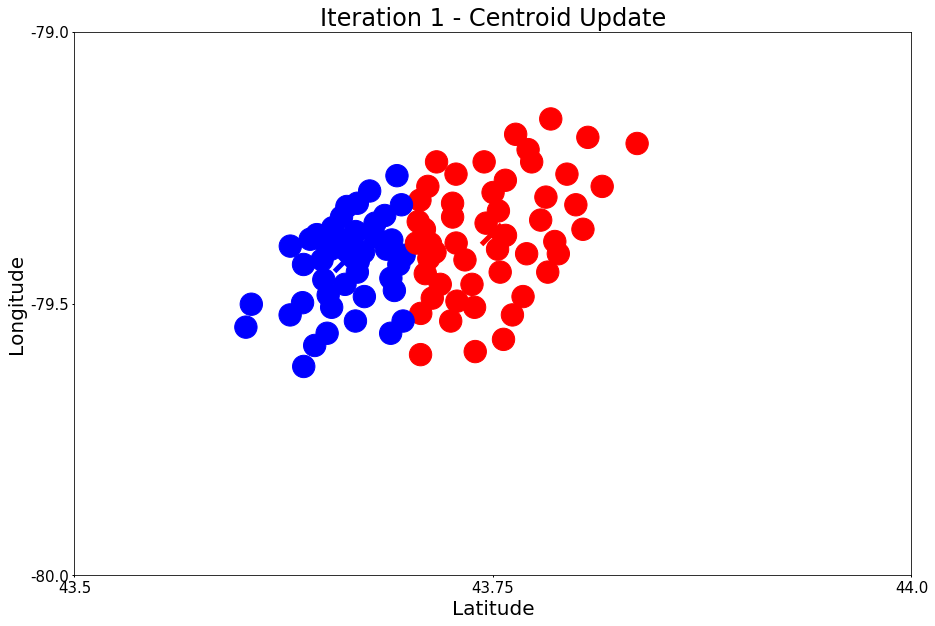

Iteration 2 - Press Enter to update the members of each cluster


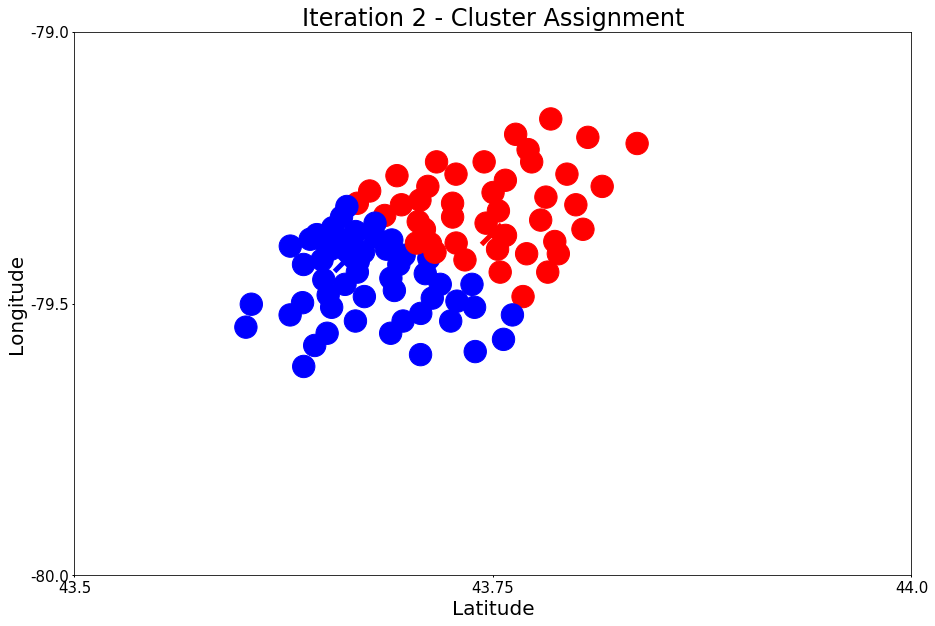

Iteration 2 - Press Enter to update the centers


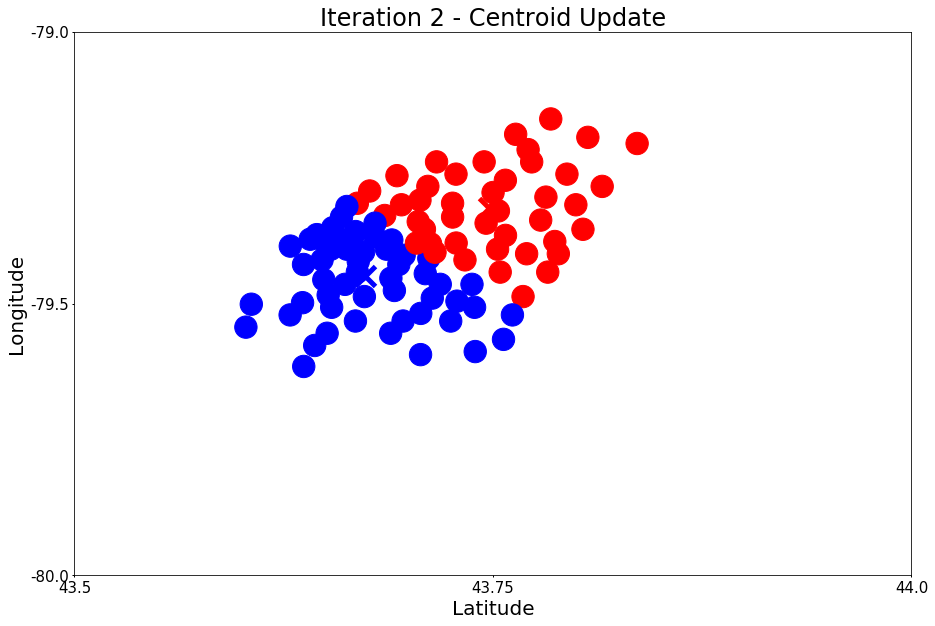

Iteration 3 - Press Enter to update the members of each cluster


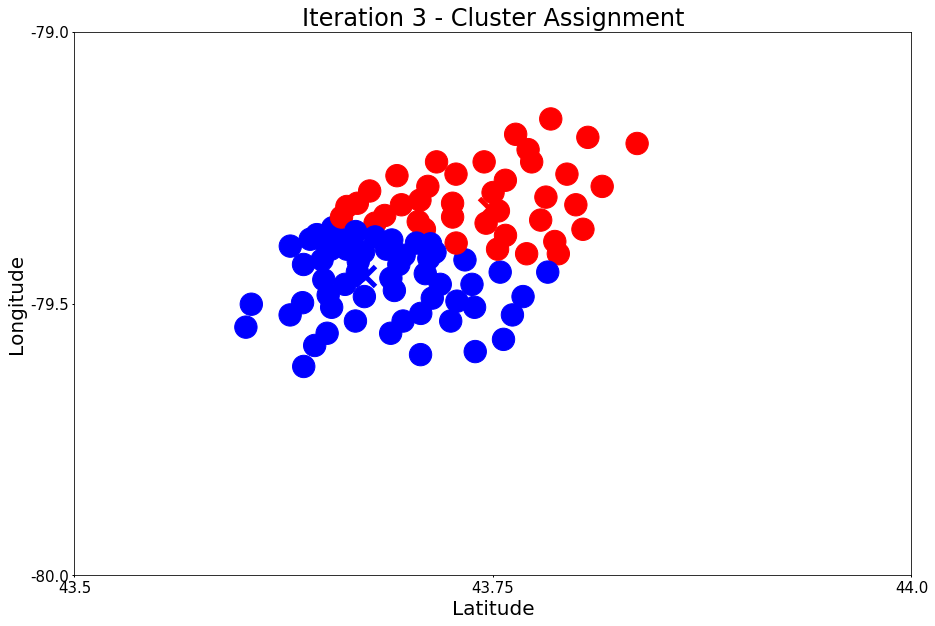

Iteration 3 - Press Enter to update the centers


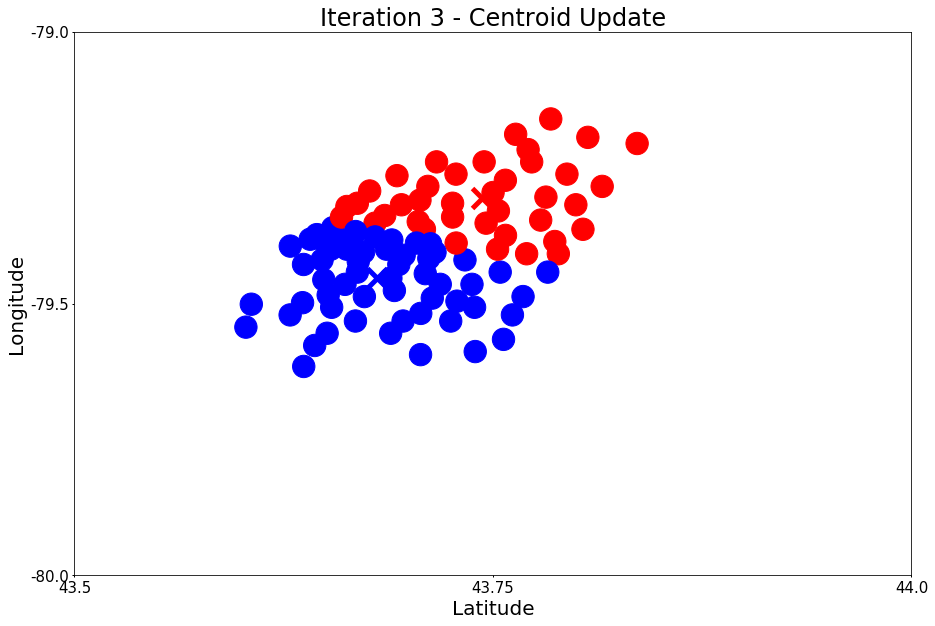

Iteration 4 - Press Enter to update the members of each cluster


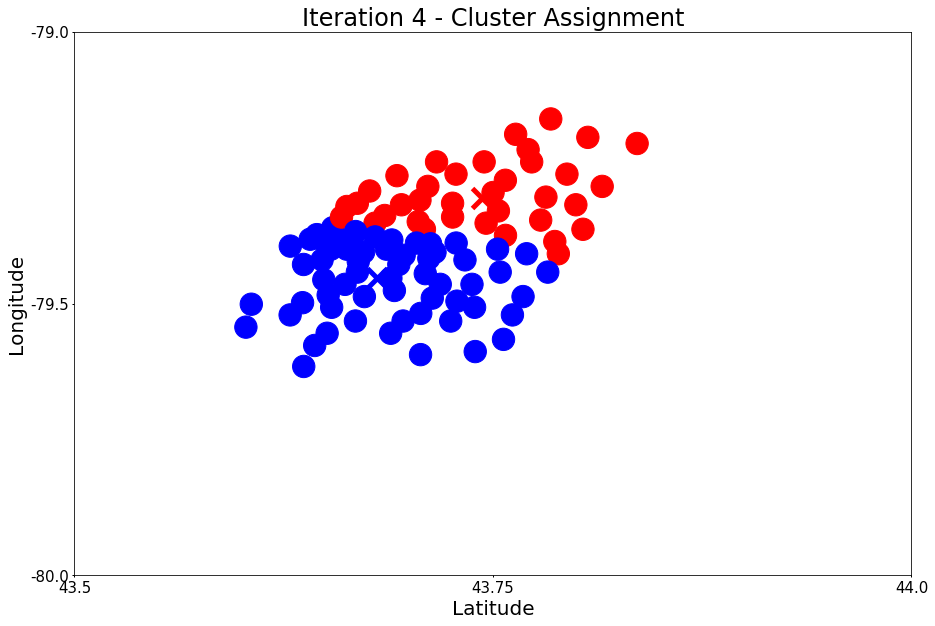

Iteration 4 - Press Enter to update the centers


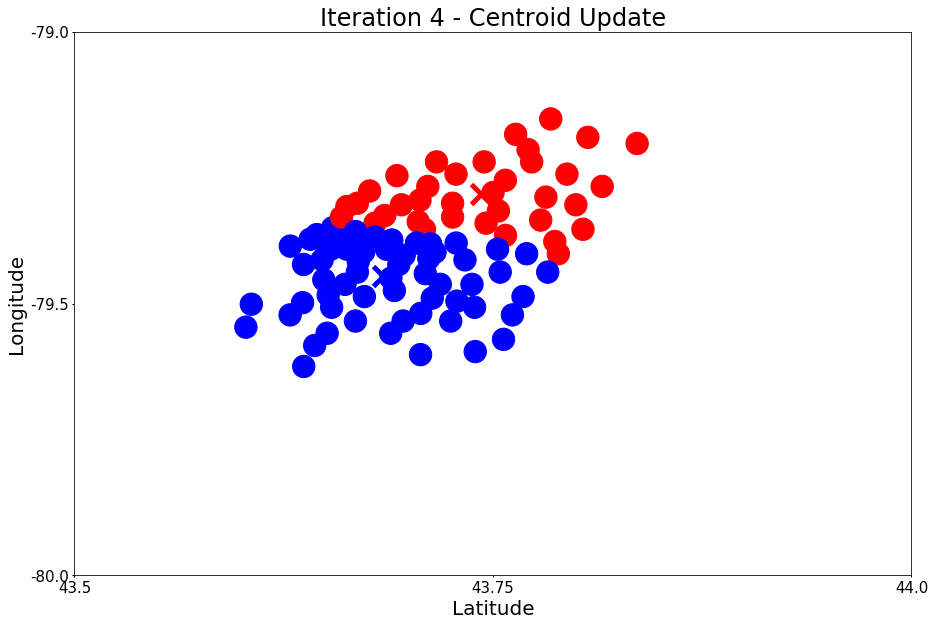

In [ ]:
number_of_iterations = 5
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(Lat, Lon, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(Lat, Lon, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)